<a href="https://colab.research.google.com/github/shuvad23/Deep-learning-with-PyTorch/blob/main/Tensors_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- CUDA stands for Compute Unified Device Architecture
- CUDA stands for Compute Unified Device Architecture and is a parallel computing platform and programming model developed by NVIDIA that allows developers to harness the power of NVIDIA Graphics Processing Units (GPUs) for general-purpose, compute-intensive tasks, rather than just graphics. It consists of a hardware architecture, a programming model, and a software platform including tools and libraries that enable programmers to accelerate applications by using the massive parallel processing capabilities of GPUs.

# Tensors in PyTorch

In [ ]:
import torch
print(torch.__version__)

2.8.0+cu126


In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
    print(f"Using GPU:{torch.cuda.get_device_name(device)}")
else:
    device = torch.device("cpu")
    print("GPU is not available")


GPU is available
Using GPU:Tesla T4


### Creating a Tensor

**1. Empty Tensor:** In PyTorch, an empty tensor is a tensor that is allocated in memory but not initialized with specific values — meaning the memory it uses may contain arbitrary (uninitialized) data.

- Note:
  -  Creates a tensor without initializing its elements.

  - The contents are whatever was already in memory — so the values are random garbage, not zeros or any predictable pattern.



In [ ]:
#using empty Tensor----
# torch.empty(size, dtype=None, device=None, requires_grad=False)

x = torch.empty(2,3)
print(x)

y = torch.empty(2,3, dtype=torch.int,device=None,requires_grad=False)
print(y)

tensor([[3.2311e-40, 0.0000e+00, 1.4714e-43],
        [1.5414e-43, 1.6255e-43, 5.6052e-44]])
tensor([[944444272,         0, 944437872],
        [        0,        80,         0]], dtype=torch.int32)


⚙️ Comparison with Other Tensor Creation Methods:
  | Function            | Description                            | Initialized Values |
| ------------------- | -------------------------------------- | ------------------ |
| `torch.empty(size)` | Uninitialized tensor                   | ❌ (random memory)  |
| `torch.zeros(size)` | Tensor of zeros                        | ✅                  |
| `torch.ones(size)`  | Tensor of ones                         | ✅                  |
| `torch.rand(size)`  | Random values in [0, 1)                | ✅                  |
| `torch.randn(size)` | Random values from normal distribution | ✅                  |


📦 Use Case

- torch.empty() is often used for performance reasons —
it skips initialization when you plan to immediately overwrite the tensor’s contents (e.g., in model layers or during computation).

In [ ]:
result = torch.empty(3,3)
torch.mm(torch.randn(3,4),torch.randn(4,3),out=result)# This saves time by avoiding unnecessary initialization.

tensor([[-1.9171, -2.8497, -1.5762],
        [ 1.2231,  0.4469,  1.4723],
        [ 2.5673,  3.4370, -1.0073]])

**2. type:**

In [ ]:
# check type:
x = torch.empty(2,3)
print(type(result))
print(x.dtype)
print(x.device)

<class 'torch.Tensor'>
torch.float32
cpu


**3. ones:**
- In PyTorch, torch.ones() is used to create a tensor filled with ones.
Unlike torch.empty(), it initializes all elements to 1 — so the values are known and stable.

- torch.ones(size, dtype=None, device=None, requires_grad=False)

Parameters:

  - size → Shape of the tensor (e.g., (2, 3))

  - dtype → (Optional) Data type, e.g. torch.float32, torch.int64

  - device → (Optional) 'cpu' or 'cuda'

  - requires_grad → If True, tracks gradients for autograd

In [ ]:
# using ones:
x = torch.ones(2,3)
print(x)

y = torch.ones(2,3, dtype= torch.int, device= None, requires_grad= False) # 🧮 Example 2 — Specify Data Type
print(y)

x = torch.ones(3, 3, device='cuda') # ⚙️ Example 3 — Create on GPU (if available)
print(x.device)

x = torch.ones(2, 2, requires_grad=True) # 📊 Example 4 — Enable Gradient Tracking
print(x)


tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
cuda:0
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


🧩 Comparison with Other Tensor Initializers:

| Function            | Values                        | Description            |
| ------------------- | ----------------------------- | ---------------------- |
| `torch.empty(size)` | Uninitialized (random memory) | Fast but unsafe values |
| `torch.zeros(size)` | All zeros                     | Initialized            |
| `torch.ones(size)`  | All ones                      | Initialized            |
| `torch.rand(size)`  | Random (0–1)                  | Uniform distribution   |
| `torch.randn(size)` | Random                        | Normal distribution    |


**4. rand:**
- In PyTorch, torch.rand() creates a tensor filled with random numbers drawn from a uniform distribution in the range [0, 1).

- It’s commonly used for initializing weights or testing models with random input data.

🧩 Syntax:
  - torch.rand(size, dtype=None, device=None, requires_grad=False)

Parameters:

- size → shape (e.g. (2, 3) or 2, 3)

- dtype → optional, e.g. torch.float32, torch.float64

- device → 'cpu' or 'cuda'

- requires_grad → whether to track gradients

In [ ]:
# using rand
x = torch.rand(2,3)
print(x) #👉 Each element is a random float between 0 and 1 (excluding 1).

x = torch.rand(2, 2, dtype=torch.float64)
print(x)
print(x.dtype)


tensor([[0.4471, 0.4639, 0.8620],
        [0.1985, 0.0131, 0.1709]])
tensor([[0.5862, 0.2388],
        [0.8228, 0.6632]], dtype=torch.float64)
torch.float64


📊 Comparison with Similar Functions:
| Function                         | Range       | Distribution                                | Example Output      |
| -------------------------------- | ----------- | ------------------------------------------- | ------------------- |
| `torch.rand()`                   | [0, 1)      | Uniform                                     | 0.62, 0.13          |
| `torch.randn()`                  | (-∞, ∞)     | Normal (mean=0, std=1)                      | -0.48, 1.23         |
| `torch.randint(low, high, size)` | [low, high) | Uniform (integers)                          | 2, 7                |
| `torch.rand_like(tensor)`        | [0, 1)      | Uniform, same shape/dtype as another tensor | same shape as input |


**5. seed:**
- In PyTorch, a random seed is used to control randomness — it ensures that random operations (like torch.rand(), shuffling, or weight initialization) produce the same results every time you run your code.
- This is called reproducibility.

🧩 Syntax:
- torch.manual_seed(seed_value)

Parameters:
- seed_value → any integer (e.g., 0, 42, 9999)

In [ ]:
# without seed:
x = torch.rand(2,4)
print(x)

tensor([[0.9720, 0.0946, 0.7117, 0.1445],
        [0.2136, 0.9324, 0.3865, 0.4589]])


In [ ]:
# using seed:
torch.manual_seed(55)
x= torch.rand(2,4)
print(x)

tensor([[0.8357, 0.9378, 0.7439, 0.5674],
        [0.8682, 0.4765, 0.0858, 0.7740]])


In [ ]:
torch.manual_seed(55)
x = torch.rand(2,4)
print(x) #✅ The same random numbers are generated each time because of the fixed seed.

tensor([[0.8357, 0.9378, 0.7439, 0.5674],
        [0.8682, 0.4765, 0.0858, 0.7740]])


**6. Tensor:**
  - In PyTorch, torch.tensor() is the main function used to create a tensor from data (like Python lists, tuples, or NumPy arrays).
It’s the most flexible and common way to create a tensor manually.

🧩 Syntax:
- torch.tensor(data, dtype=None, device=None, requires_grad=False)

Parameters:

- data → Input data (list, tuple, NumPy array, etc.)

- dtype → Data type (torch.float32, torch.int64, etc.)

- device → 'cpu' or 'cuda'

- requires_grad → Whether to track gradients for backpropagation


In [ ]:
x = torch.tensor([[1,2,3],[4,5,6]]) # 🧮 Example — 2D Tensor (Matrix)
print(x)
print(type(x))

tensor([[1, 2, 3],
        [4, 5, 6]])
<class 'torch.Tensor'>


In [ ]:
x = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float64) # ⚙️ Example — Specify Data Type
print(x)
print(x.dtype)


tensor([1., 2., 3.], dtype=torch.float64)
torch.float64


In [ ]:
import numpy as np

x = torch.from_numpy(np.array([1,2,3])) # 🧩 Example — From NumPy Array
print(x)

tensor([1, 2, 3])


🔍 Quick Summary:

| Function                    | Description                                     |
| --------------------------- | ----------------------------------------------- |
| `torch.tensor(data)`        | Creates tensor from data (copies memory)        |
| `torch.as_tensor(data)`     | Creates tensor **without copying**, if possible |
| `torch.from_numpy(ndarray)` | Shares memory with NumPy array                  |
| `torch.Tensor(data)`        | Legacy constructor (float32 default)            |


⚖️ Difference Between torch.tensor() and torch.Tensor():

| Feature           | `torch.tensor()`                             | `torch.Tensor()`                     |
| ----------------- | -------------------------------------------- | ------------------------------------ |
| **Purpose**       | Safely create a tensor from data             | Legacy constructor (like `np.array`) |
| **Default dtype** | Same as the input (e.g. int → `torch.int64`) | Always `torch.float32`               |
| **Copies data**   | ✅ Yes (always copies)                        | ✅ Yes                                |
| **Recommended?**  | ✅ Yes (modern, explicit)                     | ⚠️ Not recommended (for new code)    |


🧠 So in summary:

- ✅ Use torch.tensor() — it’s explicit, safe, and dtype-aware.

- ⚠️ Avoid torch.Tensor() for new projects — it can silently change data types.

---


**7. torch.arange:**
- In PyTorch, torch.arange() is used to create a 1D tensor containing a sequence of numbers with a specified start, end, and step size — similar to Python’s built-in range() or NumPy’s arange().

- torch.arange(start=0, end, step=1, dtype=None, device=None, requires_grad=False)

Parameters:

- start → starting value (default = 0)

- end → ending value (excluded)

- step → spacing between elements (default = 1)

- dtype → data type (e.g. torch.int32, torch.float32)

- device → 'cpu' or 'cuda'

- requires_grad → track gradients (for training)

In [ ]:
x = torch.arange(start = 0, end= 12, step=3)
print(x)

x = torch.arange(10) # only start
print(x)

x = torch.arange(10,20) # only start and end
print(x)

x = torch.arange(10,20,2.0) # step in floating point
print(x)

x = torch.arange(10,20, dtype=torch.float64)
print(x)

x = torch.arange(10,20,device="cuda")
print(x)

tensor([0, 3, 6, 9])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
tensor([10., 12., 14., 16., 18.])
tensor([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.], dtype=torch.float64)
tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], device='cuda:0')


**8.linspace:**
- In PyTorch, torch.linspace() is used to create a 1D tensor with a specified number of evenly spaced values between a start and end value — including both endpoints.

- torch.linspace(start, end, steps=100, dtype=None, device=None, requires_grad=False)

Parameters:

- start → starting value

- end → ending value (included)

- steps → number of equally spaced points (default = 100)

- dtype → data type (e.g. torch.float32)

- device → 'cpu' or 'cuda'

- requires_grad → whether to track gradients

In [ ]:
x = torch.linspace(start=0.1, end=1, steps=10)
print(x)



tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000])


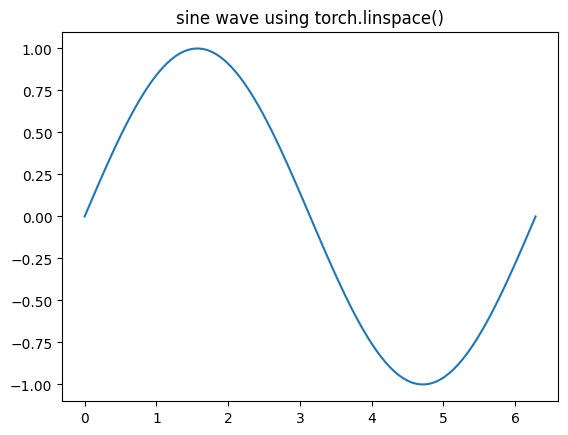

In [ ]:
import matplotlib.pyplot as plt # 📈 Example — For Plotting

x= torch.linspace(start= 0, end= 2*torch.pi, steps = 100)
y= torch.sin(x)

plt.plot(x.numpy(),y.numpy())
plt.title("sine wave using torch.linspace()")
plt.show()

**9. torch.eye:**
- In PyTorch, torch.eye() is used to create an identity matrix — a 2D tensor with 1s on the diagonal and 0s everywhere else.

- It’s very useful in linear algebra, matrix operations, and neural network layers.

🧩 Syntax:
- torch.eye(n, m=None, dtype=None, device=None, requires_grad=False)

Parameters:

- n → number of rows

- m → number of columns (default = n, so it becomes a square matrix)

- dtype → data type (e.g. torch.float32, torch.int64)

- device → 'cpu' or 'cuda'

- requires_grad → track gradients for autograd

In [ ]:
x = torch.eye(6)
print(x)

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])


**10. torch.full:**
- In PyTorch, torch.full() is used to create a tensor filled with a specific value.
Unlike torch.ones() or torch.zeros(), you can choose any value to fill the tensor.

🧩 Syntax
- torch.full(size, fill_value, dtype=None, device=None, requires_grad=False)


Parameters:

- size → shape of the tensor (tuple or list, e.g., (2, 3))

- fill_value → value to fill the tensor with

- dtype → data type (e.g., torch.float32, torch.int64)

- device → 'cpu' or 'cuda'

- requires_grad → whether to track gradients

In [ ]:
x = torch.full((2,3),5)
print(x)

tensor([[5, 5, 5],
        [5, 5, 5]])


### Tensor Shpaes

**11. shape:**

- In PyTorch, the shape of a tensor describes its dimensions — how many elements it has along each axis.
It’s one of the most fundamental properties when working with tensors.

🧩 Accessing Shape:
- tensor.shape
- Returns a torch.Size object, which behaves like a tuple.

In [ ]:
x = torch.tensor([[1,2,3,4],[3,4,5,6]])
print(x.shape)

print(x.dtype)

print(torch.empty_like(x))
print(torch.ones_like(x))
print(torch.rand_like(x,dtype=torch.float64)) # remember rand are always in floating polint number

torch.Size([2, 4])
torch.int64
tensor([[    133757796707728,           974936800,                   0,
                           0],
        [                  0, 7307199746910528123, 2318330554153050739,
         6877682122580386594]])
tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]])
tensor([[0.7416, 0.7946, 0.6670, 0.1731],
        [0.8962, 0.1438, 0.3260, 0.6675]], dtype=torch.float64)


## Mathematical Operation

🧮 1. Basic Arithmetic Operations:
| Operation            | Description                           | Example                      |
| -------------------- | ------------------------------------- | ---------------------------- |
| `+` or `torch.add()` | Element-wise addition                 | `a + b` or `torch.add(a, b)` |
| `-` or `torch.sub()` | Element-wise subtraction              | `a - b` or `torch.sub(a, b)` |
| `*` or `torch.mul()` | Element-wise multiplication           | `a * b` or `torch.mul(a, b)` |
| `/` or `torch.div()` | Element-wise division                 | `a / b` or `torch.div(a, b)` |
| `torch.matmul(a, b)` | Matrix multiplication                 | `torch.matmul(a, b)`         |
| `a @ b`              | Matrix multiplication (operator form) | `a @ b`                      |


In [ ]:
import torch

x= torch.rand(2,3)
print(x)


tensor([[0.2741, 0.9296, 0.4970],
        [0.8088, 0.6726, 0.6122]])


In [ ]:
# Addition
x=torch.add(x,10)
print(x)

x= x+10
print(x)

tensor([[20.2741, 20.9296, 20.4970],
        [20.8088, 20.6726, 20.6122]])
tensor([[30.2741, 30.9296, 30.4970],
        [30.8088, 30.6726, 30.6122]])


In [ ]:
# subtraction
x= torch.sub(x,10)
print(x)

x= x-10
print(x)

tensor([[10.2741, 10.9296, 10.4970],
        [10.8088, 10.6726, 10.6122]])
tensor([[0.2741, 0.9296, 0.4970],
        [0.8088, 0.6726, 0.6122]])


In [ ]:
#multiplication
x= torch.mul(x,10)
print(x)

x= x*10
print(x)

tensor([[2.7414, 9.2963, 4.9703],
        [8.0883, 6.7262, 6.1216]])
tensor([[27.4136, 92.9634, 49.7034],
        [80.8832, 67.2615, 61.2160]])


In [ ]:
#division
x= torch.div(x,10)
print(x)

x= x/10
print(x)

tensor([[2.7414, 9.2963, 4.9703],
        [8.0883, 6.7262, 6.1216]])
tensor([[0.2741, 0.9296, 0.4970],
        [0.8088, 0.6726, 0.6122]])


In [ ]:
# mod
x= torch.rand(2,3)
y= torch.rand(2,3)
z= x%y
print(z)

tensor([[0.0647, 0.1322, 0.0608],
        [0.0433, 0.2221, 0.3651]])


In [ ]:
# matrix multiplication
x= torch.rand(2,3)
y= torch.rand(3,2)
z= torch.matmul(x,y)
print(z)

tensor([[0.2790, 0.0868],
        [0.7854, 0.4433]])


In [ ]:
#matrix mulliplication(operator form)
x= torch.rand(2,3)
y= torch.rand(3,2)
z= x@y
print(z)

tensor([[0.4977, 0.5149],
        [0.6238, 0.6902]])


⚙️ 2. Statistical Operations:
| Function                            | Description               | Example                 |
| ----------------------------------- | ------------------------- | ----------------------- |
| `torch.sum()`                       | Sum of elements           | `torch.sum(a)`          |
| `torch.mean()`                      | Mean value                | `torch.mean(a.float())` |
| `torch.std()`                       | Standard deviation        | `torch.std(a.float())`  |
| `torch.min()` / `torch.max()`       | Minimum / Maximum element | `torch.min(a)`          |
| `torch.argmin()` / `torch.argmax()` | Index of min/max          | `torch.argmax(a)`       |


In [ ]:
# sum
x= torch.tensor([[1,2,3],[3,4,5]])
print(x)

print(torch.sum(x))
print(torch.mean(x.float()))
print(torch.std(x.float())) # standard division
print(torch.min(x))
print(torch.max(x))
print(torch.argmin(x))
print(torch.argmax(x))

print(torch.sqrt(x))
print(torch.exp(x))
print(torch.log(x))
print(torch.abs(x))
print(torch.sin(x))
print(torch.cos(x))
print(torch.tan(x))
x= torch.rand(2,3,dtype=torch.float64)
print(x)
print(torch.round(x))
print(torch.floor(x))
print(torch.ceil(x))
print(torch.clamp(x,min=1,max=2))

tensor([[1, 2, 3],
        [3, 4, 5]])
tensor(18)
tensor(3.)
tensor(1.4142)
tensor(1)
tensor(5)
tensor(0)
tensor(5)
tensor([[1.0000, 1.4142, 1.7321],
        [1.7321, 2.0000, 2.2361]])
tensor([[  2.7183,   7.3891,  20.0855],
        [ 20.0855,  54.5981, 148.4132]])
tensor([[0.0000, 0.6931, 1.0986],
        [1.0986, 1.3863, 1.6094]])
tensor([[1, 2, 3],
        [3, 4, 5]])
tensor([[ 0.8415,  0.9093,  0.1411],
        [ 0.1411, -0.7568, -0.9589]])
tensor([[ 0.5403, -0.4161, -0.9900],
        [-0.9900, -0.6536,  0.2837]])
tensor([[ 1.5574, -2.1850, -0.1425],
        [-0.1425,  1.1578, -3.3805]])
tensor([[0.5164, 0.4763, 0.5228],
        [0.7351, 0.0952, 0.9320]], dtype=torch.float64)
tensor([[1., 0., 1.],
        [1., 0., 1.]], dtype=torch.float64)
tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [ ]:
x= torch.rand(2,3)
print(x)

tensor([[0.3072, 0.4379, 0.5952],
        [0.9558, 0.2515, 0.8913]])


In [ ]:
print(torch.sum(x,dim=0))# using dimantion
print(torch.sum(x,dim=1))# using dimantion
print(torch.var(x)) # variance
print(torch.prod(x)) # product
print(torch.cumsum(x,dim=0)) # cummulative


tensor([1.2630, 0.6895, 1.4865])
tensor([1.3403, 2.0986])
tensor(0.0881)
tensor(0.0172)
tensor([[0.3072, 0.4379, 0.5952],
        [1.2630, 0.6895, 1.4865]])


Note:

🧮 1. Meaning of Standard Deviation (std)

- Standard deviation measures how spread out or how much variation there is in a set of numbers.

- A small std → values are close to the mean (less spread).

- A large std → values are far from the mean (more spread).

🔢 3. Example (Manually)

Let’s say:

- x=[1,2,3,4,5]

- Mean = (1 + 2 + 3 + 4 + 5) / 5 = 3

- Differences from mean = [-2, -1, 0, 1, 2]

- Squares = [4, 1, 0, 1, 4]

- Average = (4 + 1 + 0 + 1 + 4) / 5 = 2

- Square root = √2 = 1.4142

✅ Standard deviation = 1.4142


📊 5. Why std Matters in Deep Learning

- It’s used in data normalization (e.g., BatchNorm, LayerNorm).

- Helps ensure all features have similar scale.

- Prevents exploding or vanishing gradients during training.

---

🧠 1. Meaning of argmin and argmax

- argmax → returns the index (position) of the maximum value in a tensor.

- argmin → returns the index (position) of the minimum value in a tensor.

✅ Explanation:

- Mean = 3

- Differences = [-2, -1, 0, 1, 2]

- Squares = [4, 1, 0, 1, 4]

- Mean of squares = (4+1+0+1+4)/5 = 2.5
- So variance = 2.5

🧠 1. What is cumsum?

- cumsum stands for cumulative sum.

- It gives you a running total of elements along a given dimension of a tensor.

In simple terms —
- instead of giving just one total (like sum()), it shows how the sum builds up step by step.

## Matrix Operation

In [ ]:
x= torch.randint(size=(2,3),low=0,high=10)
y=torch.randint(size=(2,3),low=0,high=10)
print(x)
print(y)

tensor([[2, 5, 6],
        [6, 4, 3]])
tensor([[1, 5, 6],
        [4, 3, 7]])


In [ ]:
# Matrix multiplation
print(torch.matmul(x,y.T))

#dot matrix
x= torch.tensor([1,2])
y= torch.tensor([3,4])
print(torch.dot(x,y))

tensor([[63, 65],
        [44, 57]])
tensor(11)
